In [ ]:
!git clone https://github.com/WongKinYiu/yolov7.git



Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.29 MiB | 14.52 MiB/s, done.
Resolving deltas: 100% (511/511), done.


In [ ]:
%cd yolov7

/content/yolov7


In [ ]:
!pip install -r requirements.txt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive/dataset/yolo_dataset /content/

In [ ]:
!pwd

/content/yolov7


In [ ]:
!python train.py --weights yolov7.pt --cfg cfg/training/yolov7.yaml --data /content/yolo_dataset/data.yaml --hyp data/hyp.scratch.p5.yaml --batch-size 16 --epochs 100 --cache-images --name yolo_vehicle_detector

2025-06-03 05:17:16.165624: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748927836.185519   27252 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748927836.191631   27252 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-03 05:17:16.211390: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Jax plugin configuration error: Plugin module %s could not be loaded
Traceback (most recent call last):
  File "/usr/local/li

In [ ]:
import shutil
from google.colab import files

# Comprime la carpeta con los resultados del entrenamiento
shutil.make_archive('yolo_vehicle_detector8', 'zip', 'runs/train/yolo_vehicle_detector8')
3
# Descarga el zip generado
files.download('yolo_vehicle_detector8.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

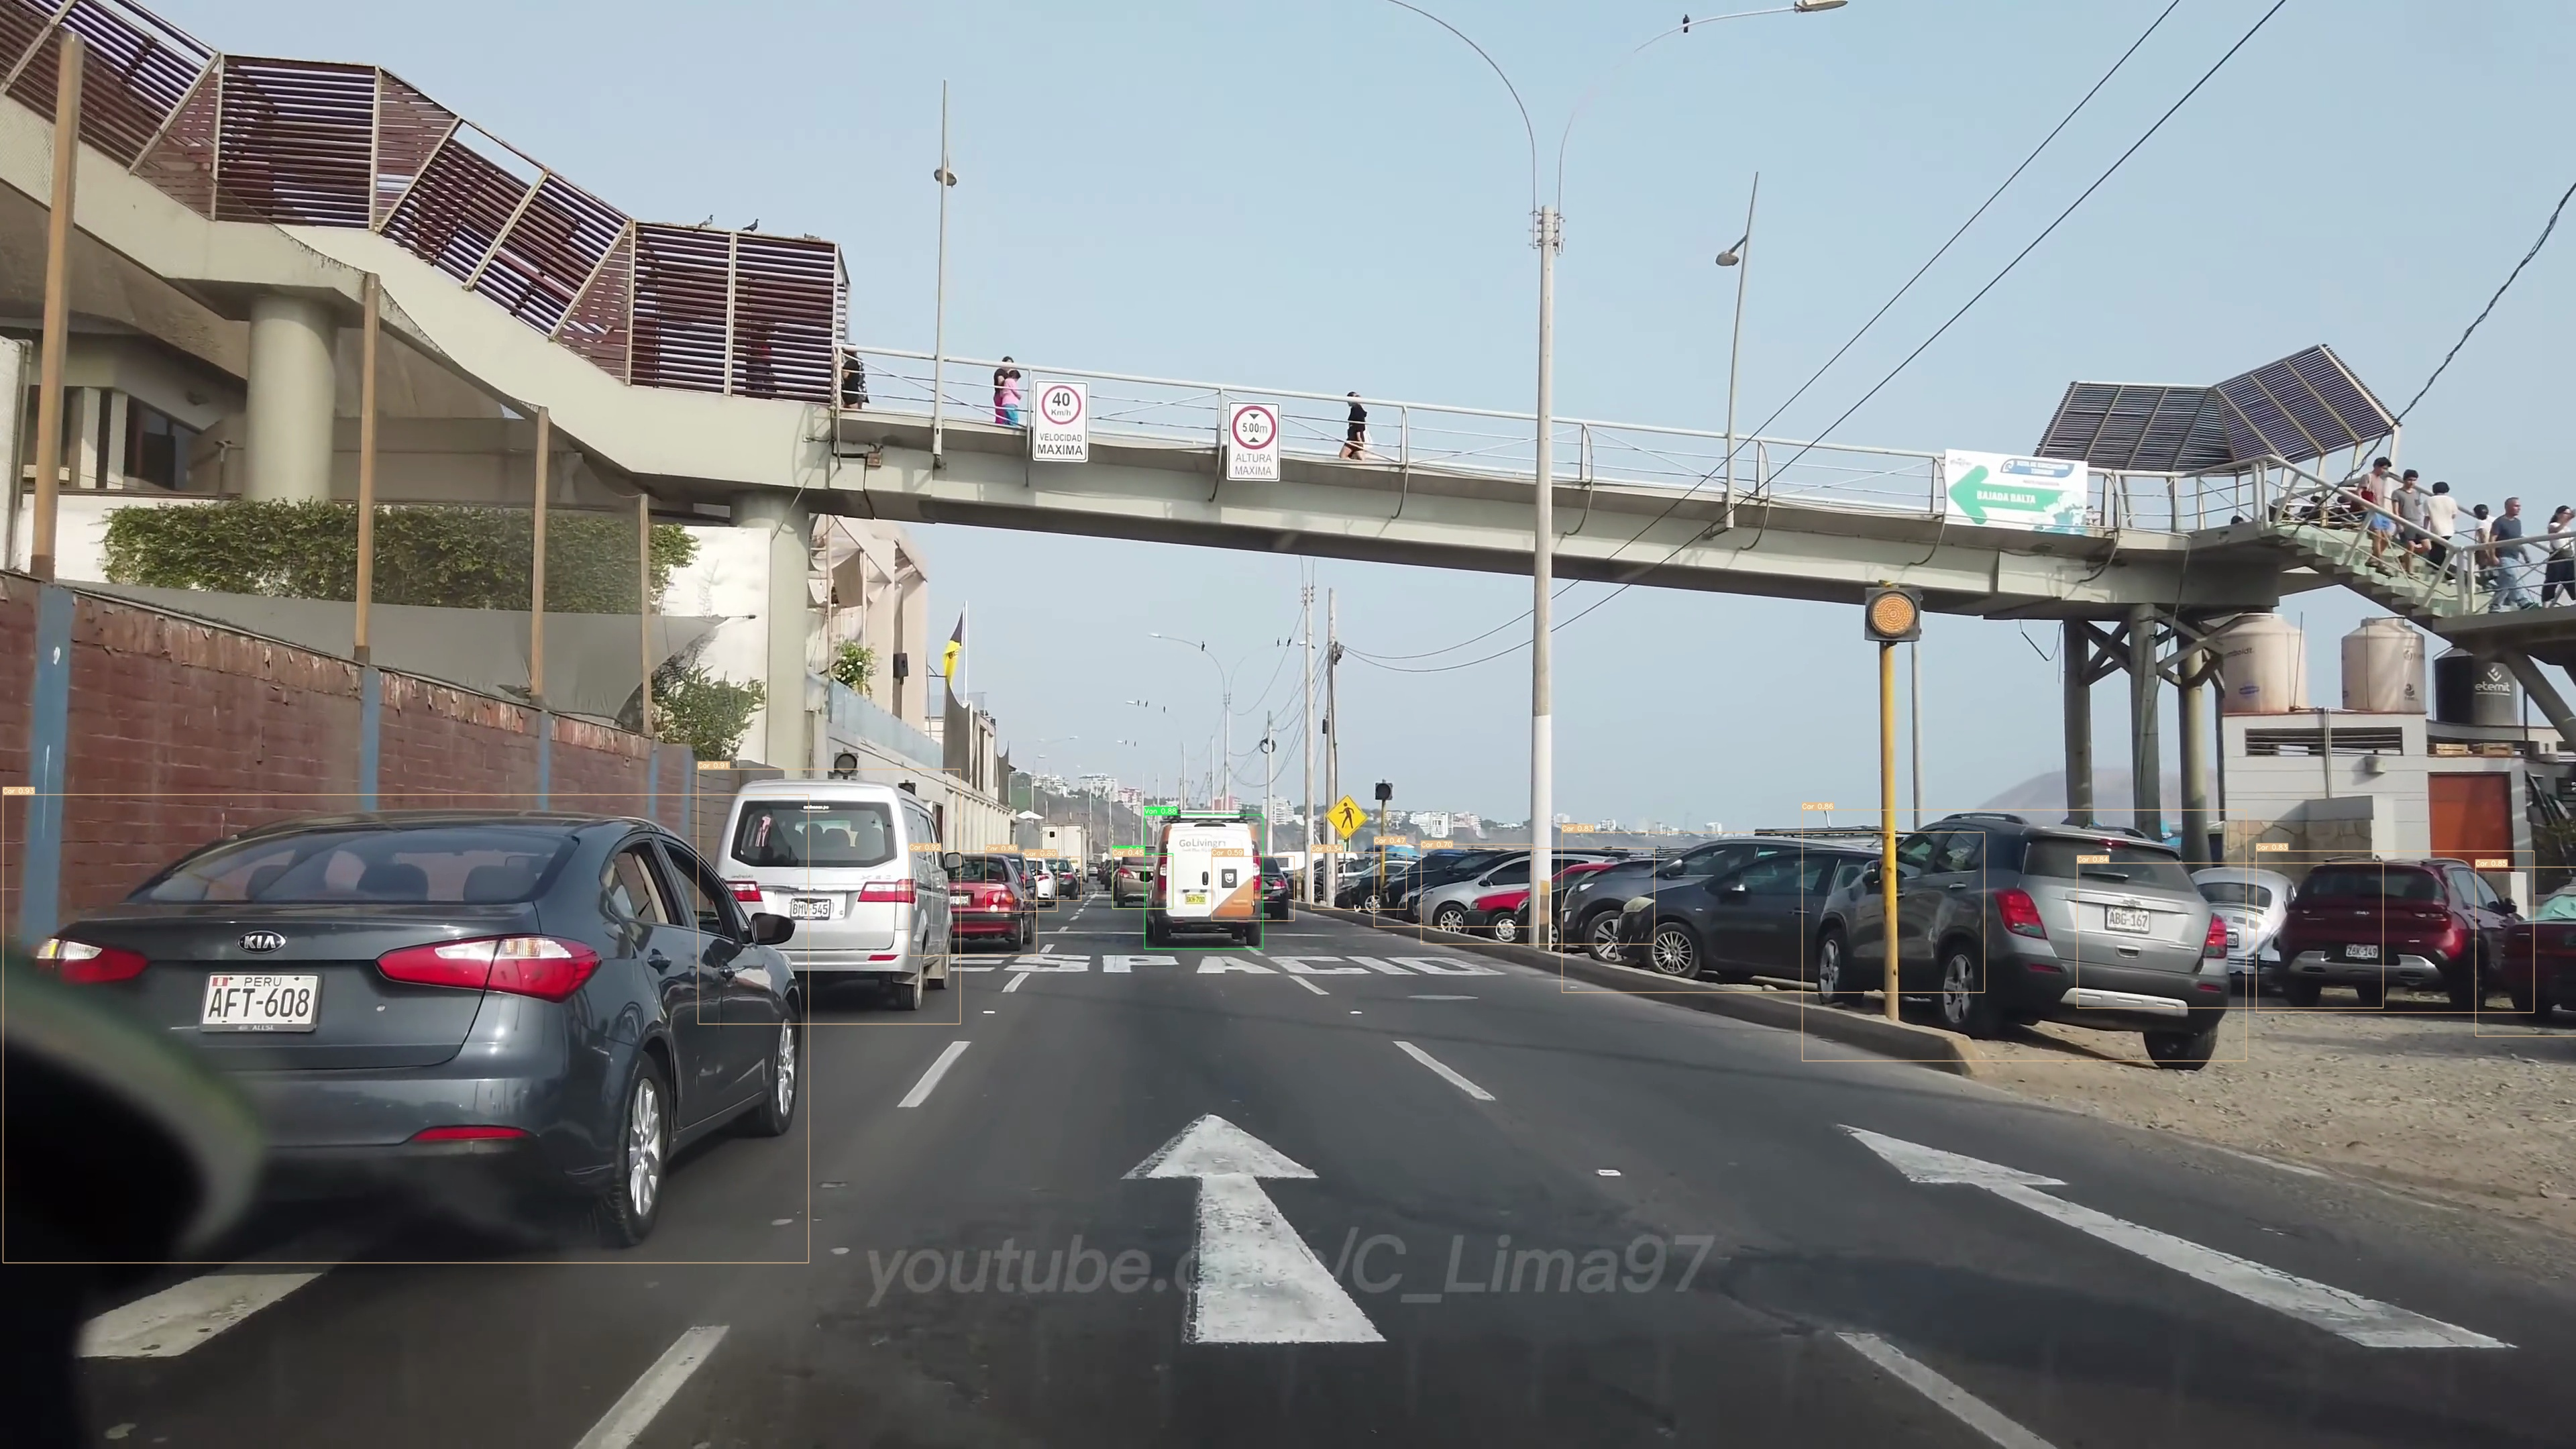

In [ ]:
from IPython.display import Image, display

# Ruta al archivo generado
result_path = 'runs/detect/vehicle_test2/test.jpg'

# Mostrar en el notebook
display(Image(filename=result_path))

In [ ]:
import torch
from pathlib import Path

def strip_optimizer(f):
    """Strip optimizer from checkpoint, save as 'f'"""
    checkpoint = torch.load(f, weights_only=False, map_location='cpu')  # ✅ importante
    checkpoint['optimizer'] = None
    checkpoint['training_results'] = None
    checkpoint['wandb_id'] = None
    checkpoint['epoch'] = -1
    checkpoint['best_fitness'] = None
    checkpoint['ema'] = None  # optional: remove exponential moving average weights
    torch.save(checkpoint, f)
    print(f"✅ Optimizer stripped. Model saved to {f}")

# ejemplo de uso
strip_optimizer("runs/train/yolo_vehicle_detector8/weights/best.pt")

✅ Optimizer stripped. Model saved to runs/train/yolo_vehicle_detector8/weights/best.pt


In [ ]:
!cp -r /content/drive/MyDrive/dataset/placa_dataset_yolo /content/

In [ ]:
!python train.py --weights yolov7.pt --cfg cfg/training/yolov7.yaml --data /content/placa_dataset_yolo/dataset.yaml --hyp data/hyp.scratch.p5.yaml --batch-size 16 --epochs 100 --cache-images --name yolo_plate_segmentator

YOLOR 🚀 v0.1-128-ga207844 torch 2.1.1+cu121 CUDA:0 (Tesla T4, 15095.0625MB)

Namespace(weights='yolov7.pt', cfg='cfg/training/yolov7.yaml', data='/content/placa_dataset_yolo/dataset.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=100, batch_size=16, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=True, image_weights=False, device='', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='yolo_plate_segmentator', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, world_size=1, global_rank=-1, save_dir='runs/train/yolo_plate_segmentator6', total_batch_size=16)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_de

In [ ]:
!cp -r /content/yolov7/runs/train/yolo_plate_segmentator6 /content/drive/MyDrive/yolo_plate_segmentator6_backup

In [ ]:
import torch
from pathlib import Path

def strip_optimizer(f):
    """Strip optimizer from checkpoint, save as 'f'"""
    checkpoint = torch.load(f, weights_only=False, map_location='cpu')  # ✅ importante
    checkpoint['optimizer'] = None
    checkpoint['training_results'] = None
    checkpoint['wandb_id'] = None
    checkpoint['epoch'] = -1
    checkpoint['best_fitness'] = None
    checkpoint['ema'] = None  # optional: remove exponential moving average weights
    torch.save(checkpoint, f)
    print(f"✅ Optimizer stripped. Model saved to {f}")

# ejemplo de uso
strip_optimizer("runs/train/yolo_plate_segmentator2/weights/best.pt")

✅ Optimizer stripped. Model saved to runs/train/yolo_plate_segmentator2/weights/best.pt
